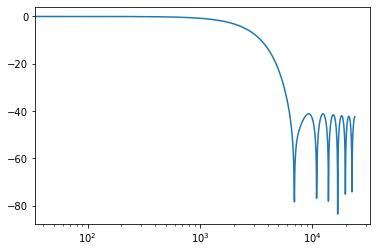

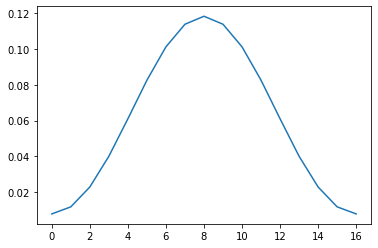

In [1]:
import numpy as np
import scipy as sp
import scipy.signal as sg
import matplotlib.pyplot as plt
Fs=48000
Fpass=1000
Order=16
Wp=Fpass/(Fs/2)
b=sg.firwin(Order+1,Wp,window = "hamming",pass_zero = True)
w,h=sg.freqz(b)
mag=20*np.log10(abs(h))
plt.figure()
plt.semilogx(w*(Fs/(2*np.pi)), mag)
plt.show()
bmax=np.max(np.abs(b))
# Working out the scale factor can be a bit tricky.  There is a 
# 24 bit accumulator in the FMAC.  The ADC has a 12bit range.
# This leaves 12 bits for coefficients if overflows are to be prevented.
# Furthermore, the multiply and accumulate nature of the FIR will push 
# results beyond 24 bits if we are not careful.  This is more pronounced with
# lower cut-off frequencies where there is a large central lobe to the filter 
# coefficients which may lead to overflows, particularly at low input 
# frequencies.  For now I'm just doing this by trial and error
ScaleFactor=4095/(bmax)
f = open('coffs.h', 'w')
f.write("#include <stdint.h>\n")
f.write("#define SCALE_FACTOR ")
f.write(str(int(np.round(ScaleFactor))))
f.write("\n")
f.write("#define FILTER_LENGTH ")
f.write(str(Order))
f.write("\n")
f.write("const int16_t b[]={")
for coeff in b:
    f.write(str(int(np.round(coeff*ScaleFactor))))
    f.write(",\n")
f.write("};\n")

f.close();
plt.figure();
plt.plot(b);

In [2]:
np.sum(b)

1.0

In [3]:
np.max(b)

0.11824009895469943

In [4]:
np.average(b)

0.058823529411764705

In [5]:
len(b)

17